<a href="https://colab.research.google.com/github/webbigdata-jp/python_sample/blob/main/Stable_Diffusion_2_1_v512_Text_to_Image_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 無料版ColabでStable Diffusion2.1を動かすためのシンプルなColabファイル

本来のStable Diffusion2.1は出力画像のサイズが768 x 768になりますが、無料版Colabではメモリ不足になってしまうため、512 x 512に変更してあります。


まずは左上の「ファイル」メニューより「ドライブにコピーを保存」を選んで、本ファイルをご自分のGoogleドライブ上にコピーして保存してください。  


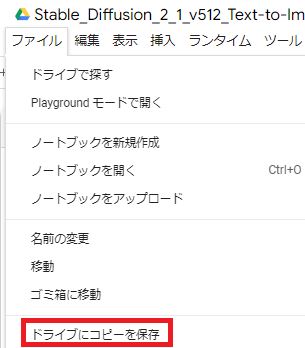

自分用に保存しておけば仮にファイルを壊してしまっても、もう一度コピーしてやり直す事ができます。  

なお、保存時に以下のような警告ウィンドウがでる事がありますが、本ファイルが信用できると思った場合は「このまま実行」を押してください。

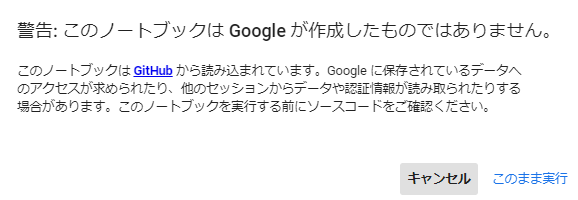


その後、左下の方に表示されている以下のマークを順番にクリックしていってください。

mark.png

１～３は起動毎に一度だけ押せば大丈夫です。４と５はプロンプトを変更する度に押す必要があります。

In [ ]:
#@title １．必要なライブラリのインストール
%%capture
%%shell
pip install -q --upgrade diffusers[torch]
pip install -q --upgrade transformers ftfy 

In [ ]:
#@title ２．Stable Diffusion 2.1モデルのダウンロード

#@markdown 丁寧な作りになっているColabファイルでは毎回ダウンロードしなくて済むようにGoogle Driveにモデルを保存する作りになっている事があります。  

#@markdown しかし、Google Driveに保存するためには「Google Driveへの権限を与えても良いですか？」と表示されるウインドウに対して承認を行うステップが増えます。  

#@markdown 初心者には何か良く分からないウインドウに対して承認を押すのはハードルが上がるので毎回ダウンロードする作りにしています。  
%%capture
%%shell
mkdir stable-diffusion-2-1
cd stable-diffusion-2-1
wget https://huggingface.co/stabilityai/stable-diffusion-2-1/raw/main/model_index.json

mkdir vae
cd vae
wget https://huggingface.co/stabilityai/stable-diffusion-2-1/raw/main/vae/config.json
wget https://huggingface.co/stabilityai/stable-diffusion-2-1/resolve/main/vae/diffusion_pytorch_model.bin

cd ..

mkdir unet
cd unet
wget https://huggingface.co/stabilityai/stable-diffusion-2-1/raw/main/unet/config.json
wget https://huggingface.co/stabilityai/stable-diffusion-2-1/resolve/main/unet/diffusion_pytorch_model.bin
cd ..

mkdir tokenizer
cd tokenizer
wget https://huggingface.co/stabilityai/stable-diffusion-2-1/raw/main/tokenizer/merges.txt
wget https://huggingface.co/stabilityai/stable-diffusion-2-1/raw/main/tokenizer/special_tokens_map.json
wget https://huggingface.co/stabilityai/stable-diffusion-2-1/raw/main/tokenizer/vocab.json
wget https://huggingface.co/stabilityai/stable-diffusion-2-1/raw/main/tokenizer/tokenizer_config.json
cd ..

mkdir text_encoder
cd text_encoder
wget https://huggingface.co/stabilityai/stable-diffusion-2-1/raw/main/text_encoder/config.json
wget https://huggingface.co/stabilityai/stable-diffusion-2-1/resolve/main/text_encoder/pytorch_model.bin
cd ..

mkdir scheduler
cd scheduler
wget https://huggingface.co/stabilityai/stable-diffusion-2-1/raw/main/scheduler/scheduler_config.json
cd ..

mkdir feature_extractor
cd feature_extractor
wget https://huggingface.co/stabilityai/stable-diffusion-2-1/raw/main/feature_extractor/preprocessor_config.json
cd ..

cd ..

In [ ]:
#@title ３．実行準備

#@markdown ここまでは一回だけ実行すれば大丈夫です。

import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("stable-diffusion-2-1", 
                                               torch_dtype=torch.float16, 
                                               low_cpu_mem_usage=True, 
                                               local_files_only=True)
pipe = pipe.to("cuda")

In [ ]:
#@title ４．promptの設定

#@markdown 描いて貰いたいイラストを以下に英語で設定してください。(プロンプト)

prompt = "a photo of an astronaut riding a horse on mars" #@param {type:"string"}

#@markdown 描いて貰いたくないイラストを英語で以下に設定してください。(ネガティブプロンプト)

negative_prompt = "Cartoon" #@param {type:"string"}


In [ ]:
#@title ５．イラストの生成

#@markdown 成功すれば以下にイラストが表示されます。

image = pipe(prompt, negative_prompt=negative_prompt, width=512, height=512).images[0]
image



---


*本Colabファイルの配布元*  
https://webbigdata.jp/